# 12. 시계열 데이터
일정 시간 간격으로 어떤 값을 기록한 데이터

## 12-1 datetime 오브젝트
datetime 라이브러리 : 날짜, 시간 처리
* date 오브젝트 : 날짜 처리
* time 오브젝트 : 시간 처리
* datetime : 날짜와 시간 처리

### datetime 오브젝트 사용

In [1]:
from datetime import datetime

#### 현재 시간 출력

In [2]:
now1 = datetime.now()
print(now1)

2019-06-18 17:42:19.809705


In [4]:
now2 = datetime.today()
print(now2)

2019-06-18 17:43:02.769264


#### 임의 시간을 datetime 오브젝트로 만들기

In [5]:
t1 = datetime.now()
t2 = datetime(1970, 1, 1)
t3 = datetime(1990, 12, 12, 13, 24, 34)

In [6]:
print(t1)
print(t2)
print(t3)

2019-06-18 17:45:40.171035
1970-01-01 00:00:00
1990-12-12 13:24:34


#### 시간 계산

In [7]:
diff1 = t1 - t2
print(diff1)
print(type(diff1))

18065 days, 17:45:40.171035
<class 'datetime.timedelta'>


In [8]:
diff2 = t2 - t1
print(diff2)
print(type(diff2))

-18066 days, 6:14:19.828965
<class 'datetime.timedelta'>


### datetime 오브젝트로 변환 - to_datetime()

#### 문자열을 datetime 오브젝트로 변환

In [9]:
import pandas as pd
import os

ebola = pd.read_csv('./doit_pandas-master/data/country_timeseries.csv')

문자열로 된 Date 열

In [10]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.2+ KB
None


#### Data열의 자료형을 변환 후 새로운 열을 만들어 추가

In [11]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(16), int64(1), object(1)
memory usag

#### format 인자
format='%d%m%y'

In [12]:
test_df1 = pd.DataFrame({'order_day': ['01/01/15', '02/01/15', '03/01/15']})

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [13]:
test_df2 = pd.DataFrame({'order_day':['01-01-15', '02-01-15', '03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')

print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


### 시간 형식 지정자
* %a : 요일 출력
* %A : 요일 출력(긴 이름)
* %w : 요일 출력(숫자, 0부터 일요일)
* %d : 날짜 출력(2자리로 표시)
* %b : 월 출력
* %B : 월 출력(긴 이름)
* %m : 월 출력(숫자)
* %y : 년 출력(2자리로 표시)
* %Y : 년 출력(4자리로 표시)
* %H : 시간 출력(24시간)
* %I : 시간 출력(12시간)
* %p : AM 또는 PM 출력
* %M : 분 출력(2자리로 표시)
* %S : 초 출력(2자리로 표시)
* %f : 마이크로초 출력
* %z : UTC 차이 출력(+HHMM 이나 -HHMM 형태)
* %Z : 기준 지역 이름 출력
* %j : 올해의 지난 일 수 출력(1일, 2일, ...)
* %U : 올해의 지난 주 수 출력(1주, 2주, ...)
* %c : 날짜와 시간 출력(Tue Aug 16 21:30:00 1988)
* %x : 날짜 출력(08/16/88)
* %X : 시간 출력(21:30:00)
* %G : 년 출력(ISO 8601 형식)
* %u : 요일 출력(ISO 8601 형식)
* %V : 올해의 지난 주 수 출력(ISO 8610 형식)

#### strftime()

In [14]:
now = datetime.now()
print(now)

2019-06-18 18:14:08.107433


In [15]:
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2019-06-18


In [16]:
nowTime = now.strftime('%H:%M:%S')
print(nowTime)

18:14:08


In [17]:
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2019-06-18 18:14:08


### datetime 오브젝트로 변환 - read_csv()
* 열을 지정하여 datetime 오브젝트로 불러오기
* parse_dates 인자 사용

In [20]:
ebola1 = pd.read_csv('./doit_pandas-master/data/country_timeseries.csv', parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: datetime64[ns](1), float64(16), int64(1)
memory usage: 17.2 KB
None


In [21]:
print(ebola1.head(5))

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0 2015-01-05  289        2776.0            NaN            10030.0   
1 2015-01-04  288        2775.0            NaN             9780.0   
2 2015-01-03  287        2769.0         8166.0             9722.0   
3 2015-01-02  286           NaN         8157.0                NaN   
4 2014-12-31  284        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            NaN            NaN                 NaN          NaN         NaN   
1            NaN            NaN                 NaN          NaN         NaN   
2            NaN            NaN                 NaN          NaN         NaN   
3            NaN            NaN                 NaN          NaN         NaN   
4            NaN            NaN                 NaN          NaN         NaN   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
0         1786.0             NaN

### datetime 오브젝트에서 날짜 정보 추출
* datetime 오브젝트에는 년, 월, 일과 같은 날짜 정보를 따로 저장하는 속성이 있다.
* 문자열 - 시리즈에 담아 - datetime 오브젝트로 변환

In [22]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


#### year, month, day 속성

In [23]:
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


### df 접근자 사용
df 접근자로 시계열 데이터 정리

In [24]:
ebola = pd.read_csv('./doit_pandas-master/data/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [26]:
print(ebola[['Date', 'date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [27]:
print(ebola['date_dt'][3].year)

2015


In [29]:
print(ebola['date_dt'][3].month)

1


In [30]:
print(ebola['date_dt'][3].day)

2


#### dt 접근자로 date_dt 에 한 번에 접근

In [32]:
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date', 'date_dt', 'year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


#### dt 접근자로 월, 일 한번에 추출

In [33]:
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)

print(ebola[['Date', 'date_dt', 'year', 'month', 'day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


date_dt만 datetime 오브젝트

In [34]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
year                   122 non-null int64
month                  122 no

## 12-2 사례별 시계열 데이터 계산

### 에볼라 최초 발병일 계산

In [35]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [36]:
print(ebola.head())

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0    1/5/2015  289        2776.0            NaN            10030.0   
1    1/4/2015  288        2775.0            NaN             9780.0   
2    1/3/2015  287        2769.0         8166.0             9722.0   
3    1/2/2015  286           NaN         8157.0                NaN   
4  12/31/2014  284        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            NaN            NaN                 NaN          NaN         NaN   
1            NaN            NaN                 NaN          NaN         NaN   
2            NaN            NaN                 NaN          NaN         NaN   
3            NaN            NaN                 NaN          NaN         NaN   
4            NaN            NaN                 NaN          NaN         NaN   

   ...  Deaths_SierraLeone  Deaths_Nigeria  Deaths_Senegal  \
0  ...              2977.0          

min()로 최초 발병일 찾기

In [38]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


* Timestamp는 Datetime 오브젝트와 호환되는 자료형
* Date 열에서 최초 발병일을 빼서 진행 정도 보기

In [39]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date', 'Day', 'outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


### 파산한 은행의 개수 계산

In [40]:
banks = pd.read_csv('./doit_pandas-master/data/banklist.csv')
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


In [41]:
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Bank Name                555 non-null object
City                     555 non-null object
ST                       555 non-null object
CERT                     555 non-null int64
Acquiring Institution    555 non-null object
Closing Date             555 non-null object
Updated Date             555 non-null object
dtypes: int64(1), object(6)
memory usage: 30.4+ KB
None


In [42]:
banks = pd.read_csv('./doit_pandas-master/data/banklist.csv', parse_dates=[5, 6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Bank Name                555 non-null object
City                     555 non-null object
ST                       555 non-null object
CERT                     555 non-null int64
Acquiring Institution    555 non-null object
Closing Date             555 non-null datetime64[ns]
Updated Date             555 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB
None


#### 은행 파산 분기 알아보기
df 접근자 & quarter 속성

In [43]:
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

#### 연도별 파산한 은행 수

In [44]:
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [46]:
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

#### 그래프 

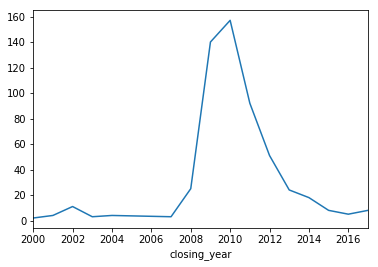

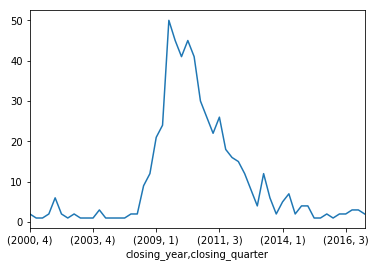

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

### 테슬라 주식 데이터로 시간 계산
* pandas-datareader 라이브러리
* get_data_quandl()

In [56]:
import pandas as pd
import quandl

# quandl에서 api_key로 인증
# https://www.quandl.com/
quandl.ApiConfig.api_key = "API key를 입력"

# tesla에는 데이터 프레임이 저장
tesla = quandl.get('BATS/BATS_TSLA')

# tesla에 저장된 데이터프레임을 파일로 저장
tesla.to_csv('./doit_pandas-master/data/tesla_stock_quandl.csv')

In [57]:
print(tesla.head())

            Short Volume  Total Volume
Date                                  
2010-06-29      519232.0     1086984.0
2010-06-30      309457.0      629033.0
2010-07-01      112425.0      299553.0
2010-07-02      153978.0      225273.0
2010-07-06      179262.0      308389.0


In [58]:
tesla.shape

(2256, 2)

Date 열은 문자열로 저장되어 있음.

datetime 오브젝트로 변환해야 시간 계산 가능.

read_csv() 에서 parse_dates=['Date']

In [59]:
tesla = pd.read_csv('./doit_pandas-master/data/tesla_stock_quandl.csv', parse_dates=['Date'])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 3 columns):
Date            2256 non-null datetime64[ns]
Short Volume    2256 non-null float64
Total Volume    2256 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 53.0 KB
None


2010년 6월 데이터만 추출

In [60]:
print(tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)])

        Date  Short Volume  Total Volume
0 2010-06-29      519232.0     1086984.0
1 2010-06-30      309457.0      629033.0


### datetime 오브젝트와 인덱스 - DatetimeIndex
행 번호 인덱스 사용하지 않고도 원하는 시간의 데이터 바로 추출.

datetime 오브젝트인 'Date'를 인덱스로 지정

In [61]:
tesla.index = tesla['Date']
print(tesla.index)

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2019-06-03', '2019-06-04', '2019-06-05', '2019-06-06',
               '2019-06-07', '2019-06-10', '2019-06-11', '2019-06-12',
               '2019-06-13', '2019-06-14'],
              dtype='datetime64[ns]', name='Date', length=2256, freq=None)


2015년 데이터를 추출

In [62]:
print(tesla['2015'].iloc[:5, :5])

                 Date  Short Volume  Total Volume
Date                                             
2015-01-02 2015-01-02      155110.0      208634.0
2015-01-05 2015-01-05      164375.0      238500.0
2015-01-06 2015-01-06      152115.0      208410.0
2015-01-07 2015-01-07       88175.0      118442.0
2015-01-08 2015-01-08       86578.0      116529.0


2010년 6월 데이터 추출

In [64]:
print(tesla['2010-06'].iloc[:, :5])

                 Date  Short Volume  Total Volume
Date                                             
2010-06-29 2010-06-29      519232.0     1086984.0
2010-06-30 2010-06-30      309457.0      629033.0


### 시간 간격과 인덱스 - TimedeltaIndex
최초 5일간의 수집 데이터만 살펴보고 싶다면?

시간 간격을 인덱스로 지정하여 추출하면 됨.

datetime 오브젝트를 인덱스로 지정하지 않고 시간 간격을 인덱스로 지정

'Date'의 최솟값을 빼서 구함

In [68]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
print(tesla.tail())

                Date  Short Volume  Total Volume  ref_date
ref_date                                                  
3268 days 2019-06-10      302928.0      492044.0 3268 days
3269 days 2019-06-11      280156.0      504822.0 3269 days
3270 days 2019-06-12      365437.0      674821.0 3270 days
3271 days 2019-06-13      158004.0      366369.0 3271 days
3272 days 2019-06-14      178339.0      404336.0 3272 days


In [70]:
tesla.index = tesla['ref_date']
print(tesla.iloc[-5:, :5])

                Date  Short Volume  Total Volume  ref_date
ref_date                                                  
3268 days 2019-06-10      302928.0      492044.0 3268 days
3269 days 2019-06-11      280156.0      504822.0 3269 days
3270 days 2019-06-12      365437.0      674821.0 3270 days
3271 days 2019-06-13      158004.0      366369.0 3271 days
3272 days 2019-06-14      178339.0      404336.0 3272 days


In [67]:
print(tesla['5 days':].iloc[:5, :5])

               Date  Short Volume  Total Volume ref_date
ref_date                                                
7 days   2010-07-06      179262.0      308389.0   7 days
8 days   2010-07-07      161303.0      307225.0   8 days
9 days   2010-07-08      210380.0      455840.0   9 days
10 days  2010-07-09      101845.0      180458.0  10 days
13 days  2010-07-12       53050.0       89049.0  13 days


### 시간 범위와 인덱스

특정일에 누락된 데이터를 포함하여 살펴보려면?

임의로 시간 범위를 생성하여 인덱스로 지정

In [71]:
ebola = pd.read_csv('./doit_pandas-master/data/country_timeseries.csv', parse_dates=[0])
print(ebola.iloc[:5, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [73]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [74]:
head_range = pd.date_range(start='2014-12-31', end='2015-01-03')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03'], dtype='datetime64[ns]', freq='D')


In [78]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
print(ebola_5.iloc[:5, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


In [79]:
ebola_5.reindex(head_range)
print(ebola_5.iloc[:5, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


#### 시간 범위의 주기 설정
시간 범위를 인덱스로 지정하면 DatetimeIndex 자료형이 만들어짐.

DatetimeIndex에는 freq 속성이 포함 됨.

freq 속성값을 지정하면 시간 간격을 조절하여 DatetimeIndex를 만들 수 있음.

* B : 평일만 포함
* C : 사용자가 정의한 평일만 포함
* D : 달력 일자 단위
* W : 주간 단위
* M : 월 마지막 날만 포함
* SM : 15일과 월 마지막 날만 포함
* BM : M 주기의 값이 휴일이면 제외하고 평일만 포함
* CBM : BM에 사용자 정의 평일을 적용
* MS : 월 시작일만 포함
* SMS : 월 시작일과 15일만 포함
* BMS : MS 주기의 값이 휴일이면 제외하고 평일만 포함
* CBMS : BMS에 사용자 정의 평일을 적용
* Q : 3, 6, 9, 12월 분기 마지막 날만 포함
* BQ : 3, 6, 9, 12월 분기 마지막 날이 휴일이면 제외하고 평일만 포함
* QS : 3, 6, 9, 12분기 시작일만 포함
* BQS : 3, 6, 9, 12월 분기 시작일이 휴일이면 제외하고 평일만 포함
* A : 년의 마지막 날만 포함
* BA : 년의 마지막 날이 휴일이면 제외하고 평일만 포함
* AS : 년의 시작일만 포함
* BAS : 년의 시작일이 휴일이면 제외하고 평일만 포함
* BH : 평일을 시간 단위로 포함(09:00 ~ 16:00)
* H : 시간 단위로 포함(00:00 ~ 00:00)
* T : 분 단위 포함
* S : 초 단위 포함
* L : 밀리초 단위 포함
* U : 마이크로초 단위 포함
* N : 나노초 단위 포함

In [80]:
print(pd.date_range('2017-01-01', '2017-01-07', freq='B'))

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')


### 시간 범위 수정하고 데이터 밀어내기 - shift()
나라별로 에볼라 확산 속도를 비교하려면

발생 시작 날짜를 옮기는 것이 좋다.

#### 에볼라 확산 속도 비교

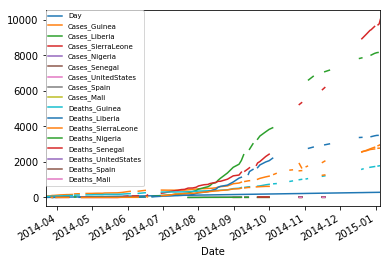

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt

ebola.index = ebola['Date']

fig, ax = plt.subplots()
ax = ebola.iloc[0:, 1:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

In [83]:
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


#### 그래프를 그리기 위한 데이터 프레임 준비
없는 날짜 데이터도 포함시켜야 확산 속도를 제대로 비교 가능

In [84]:
ebola = pd.read_csv('./doit_pandas-master/data/country_timeseries.csv', parse_dates=['Date'])

print(ebola.head().iloc[:, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [85]:
print(ebola.iloc[:, :5].tail())

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


#### 'Date'열을 인덱스로 지정한 다음 ebola 데이터프레임의 Date열의 최대/최솟값으로 시간 범위 생성
new_idx에 저장함. 없던 날짜 데이터의 인덱스 생성 가능

In [86]:
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

ebola 데이터 집합의 시간 순서와 반대로 되어 있음.

시간 순서를 맞추기 위해 reversed() 사용하여 인덱스를 뒤집음

In [88]:
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [89]:
new_idx = reversed(new_idx)
print(new_idx)

In [90]:
ebola = ebola.reindex(new_idx)

print(ebola.head().iloc[:, :5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN


In [91]:
print(ebola.iloc[:, :5].tail())

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 2014-03-22  0.0          49.0            NaN                NaN


#### 각 나라의 에볼라 발병일 옮기기
last_valid_index(), first_valid_index() 사용, 각 나라의 발병일을 구함.

각각의 메서드는 유효한 값이 있는 첫 번째와 마지막 인덱스를 반환

In [92]:
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [93]:
first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


발병한 날(earliest_date)에서 각 나라의 에볼라 발병일을 뺀 만큼(shift_values)만 옮기면 됨

In [94]:
earliest_date = ebola.index.min()
print(earliest_date)

2014-03-22 00:00:00


In [95]:
shift_values = last_valid - earliest_date
print(shift_values)

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


shift()로 모든 열의 값을 shift_values 값 만큼 옮긴다.

shift()는 인잣값만큼 데이터를 밀어내는 메서드이다.

In [96]:
ebola_dict = {}
for idx, col in enumerate(ebola):
    d = shift_values[idx].days
    shifted = ebola[col].shift(d)
    ebola_dict[col] = shifted

ebola_dict에는 시간을 재 설정한 데이터가 딕셔너리 형태로 저장됨.

DataFrame()을 이용해서 ebola_dict를 데이터프레임으로 변환

In [97]:
ebola_shift = pd.DataFrame(ebola_dict)

In [98]:
print(ebola_shift.tail())

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

최초 발병일(2014-03-22) 기준으로 모든 열의 데이터가 옮겨짐.

인덱스를 Day 열로 지정하고, 그래프에 필요 없는 Date, Day 열은 삭제. 

In [99]:
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date', 'Day'], axis=1)

print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

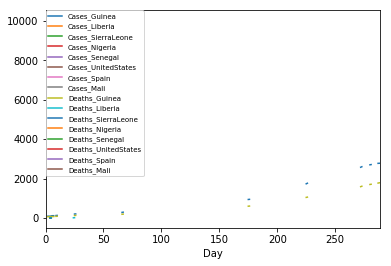

In [100]:
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:, :].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

x축이 Day로 변경